In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

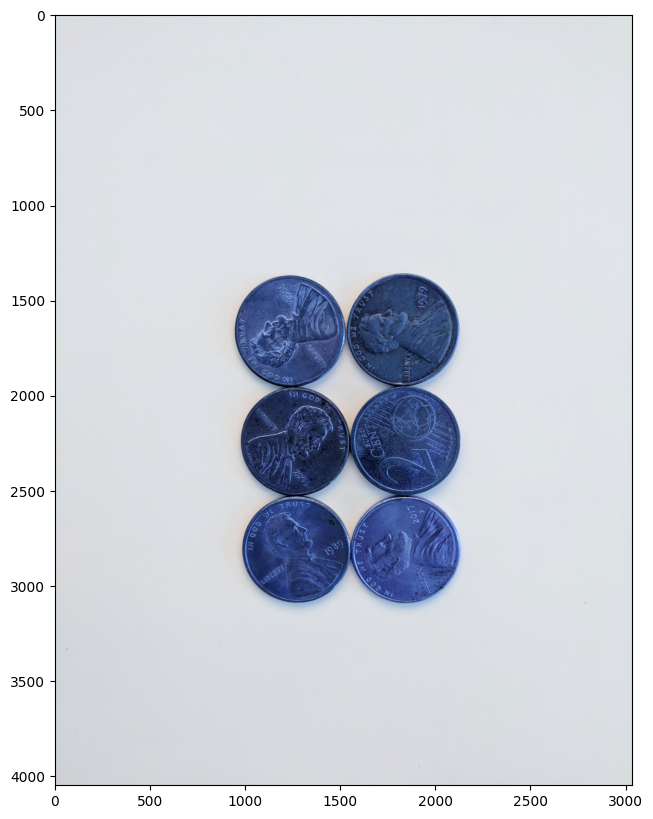

In [3]:
sep_coins = cv2.imread('DATA/pennies.jpg')
display(sep_coins)

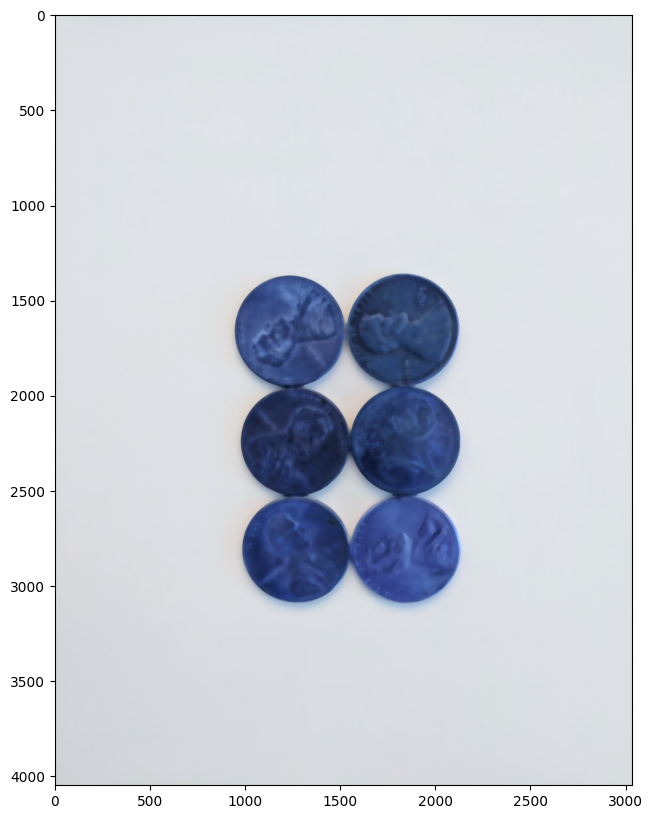

In [8]:
sep_blur = cv2.medianBlur(sep_coins, 25)
display(sep_blur)

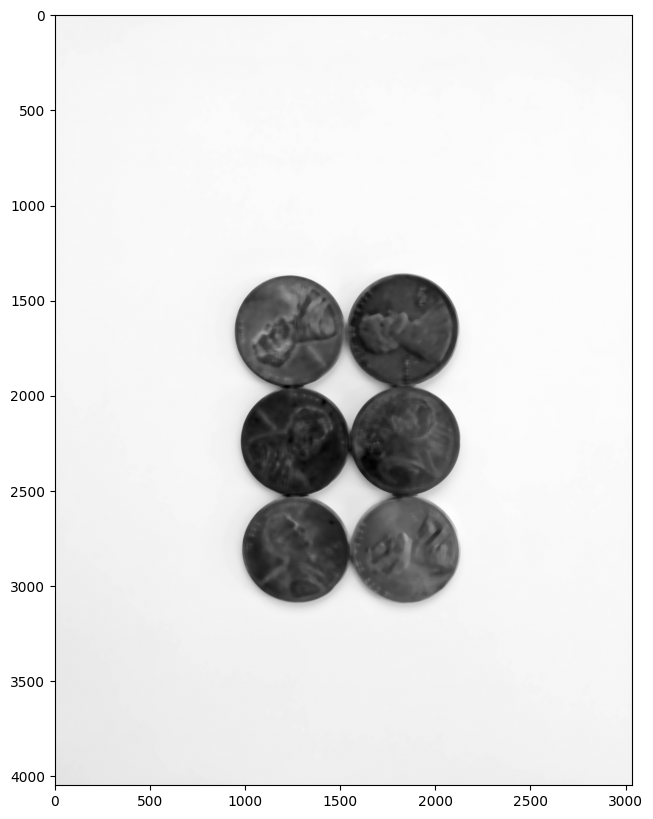

In [9]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)
display(gray_sep_coins)

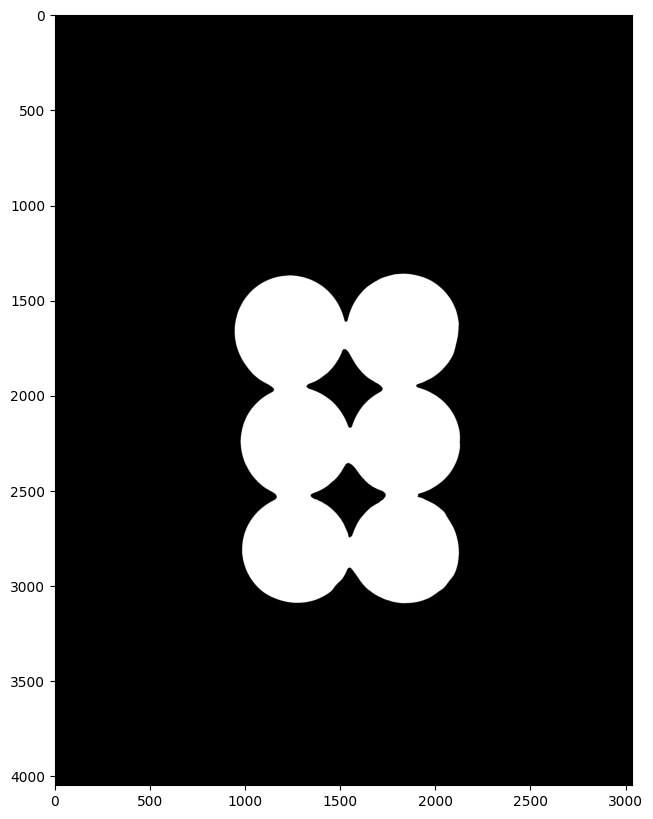

In [11]:
ret, sep_thresh = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)
display(sep_thresh)

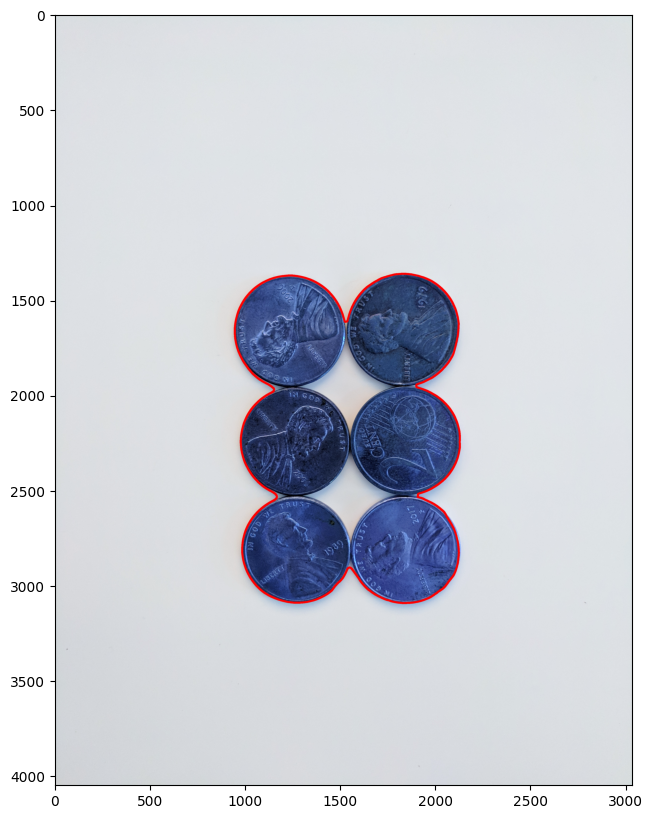

In [12]:
contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if(hierarchy[0][i][3] == -1):
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

display(sep_coins)

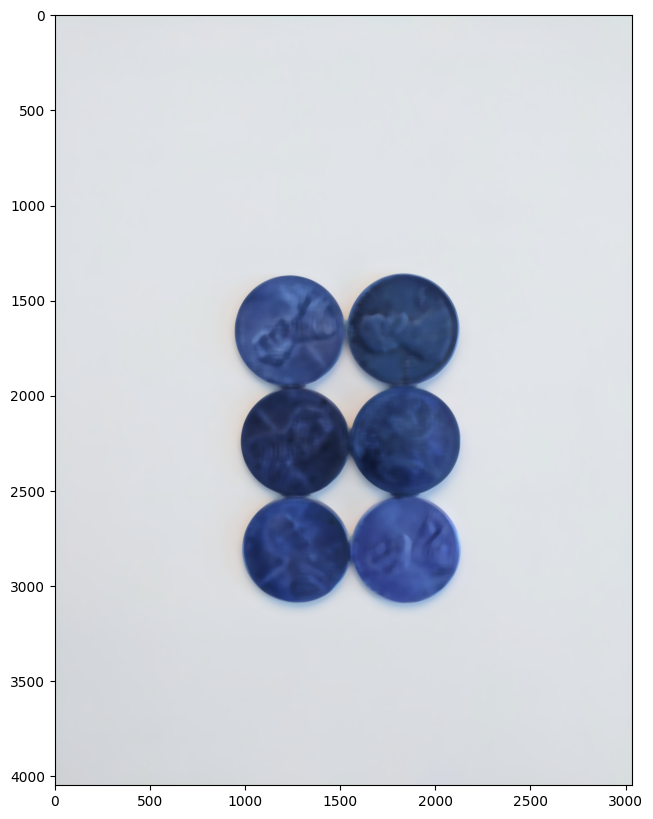

In [14]:
img = cv2.imread('DATA/pennies.jpg')
img = cv2.medianBlur(img, 35)
display(img)

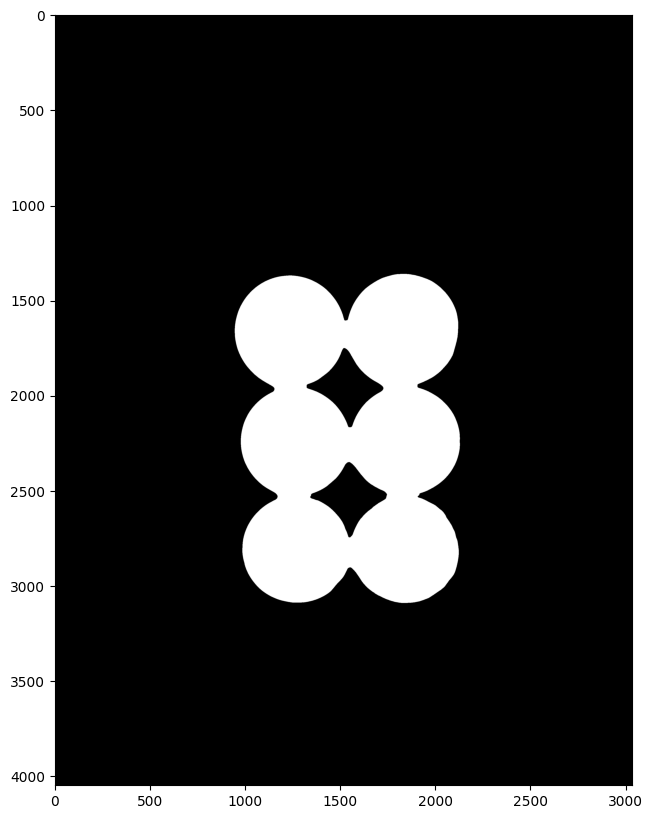

In [19]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh)

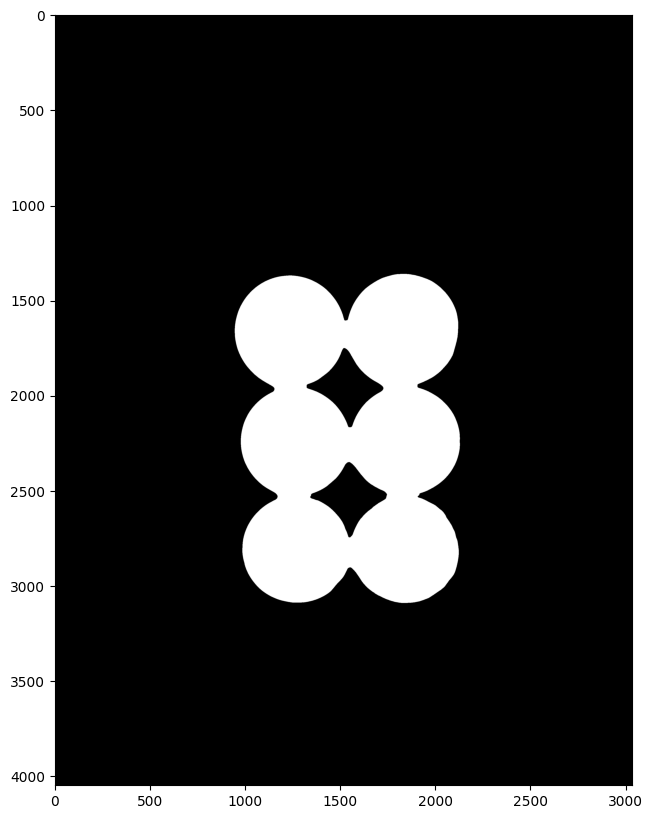

In [22]:
# Noise removal (Optional)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
display(opening)

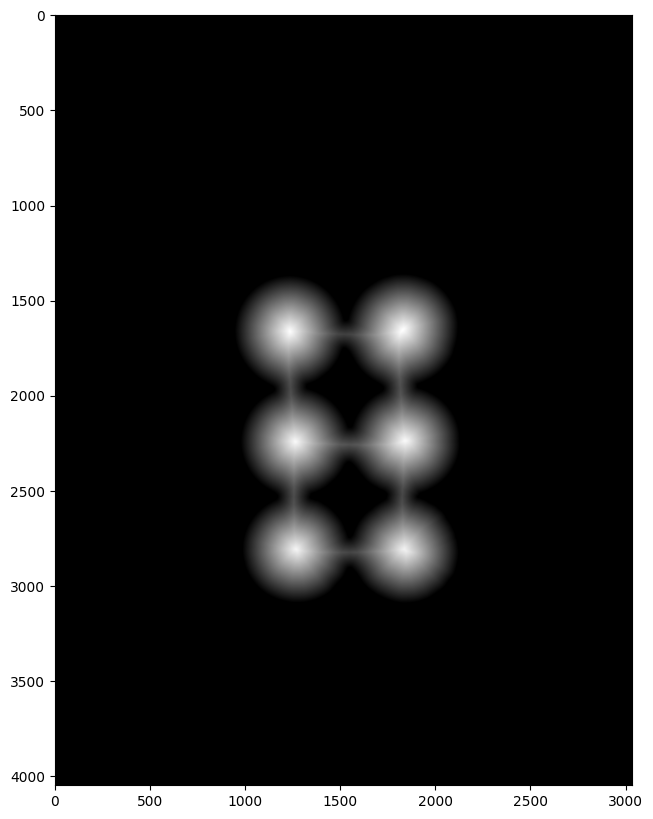

In [23]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
display(dist_transform)

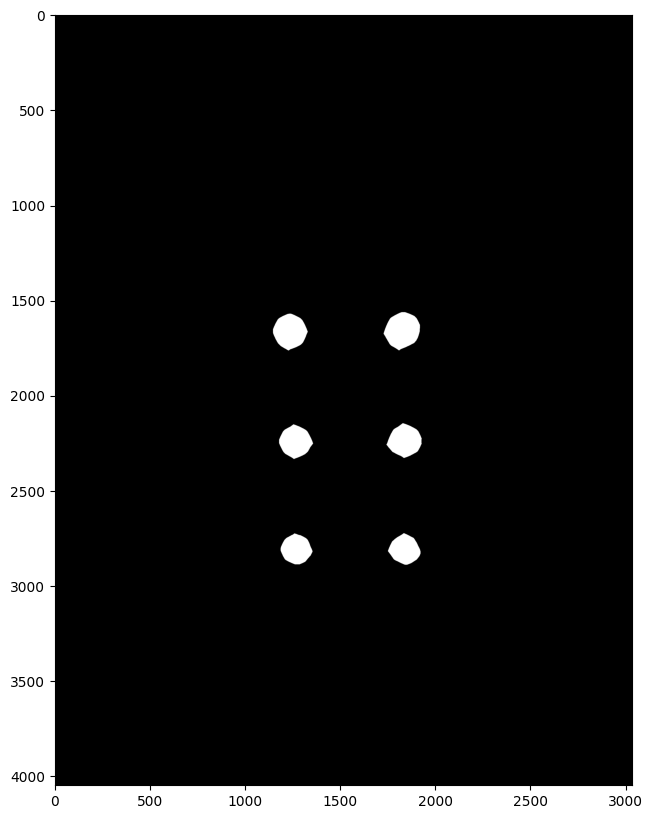

In [24]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
display(sure_fg)

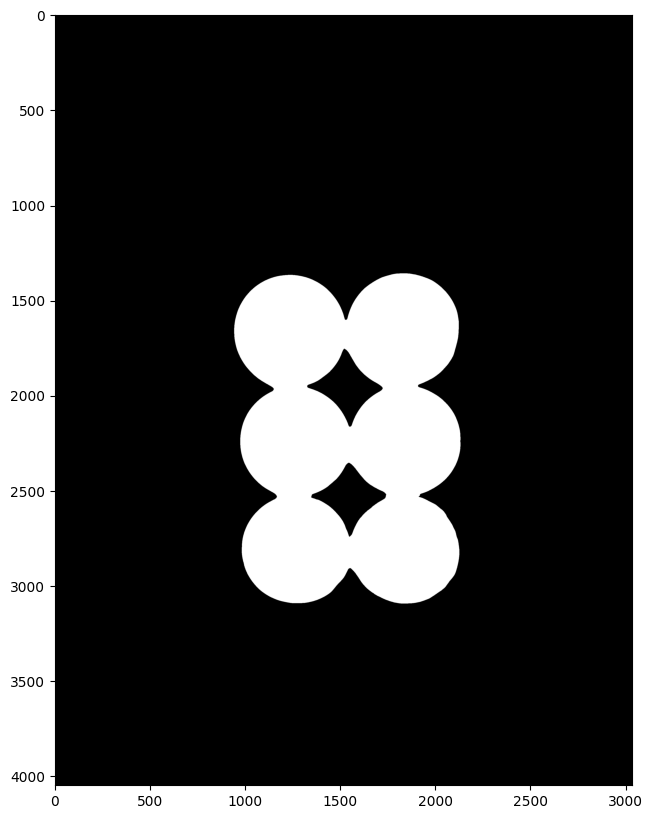

In [32]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)
display(sure_bg)

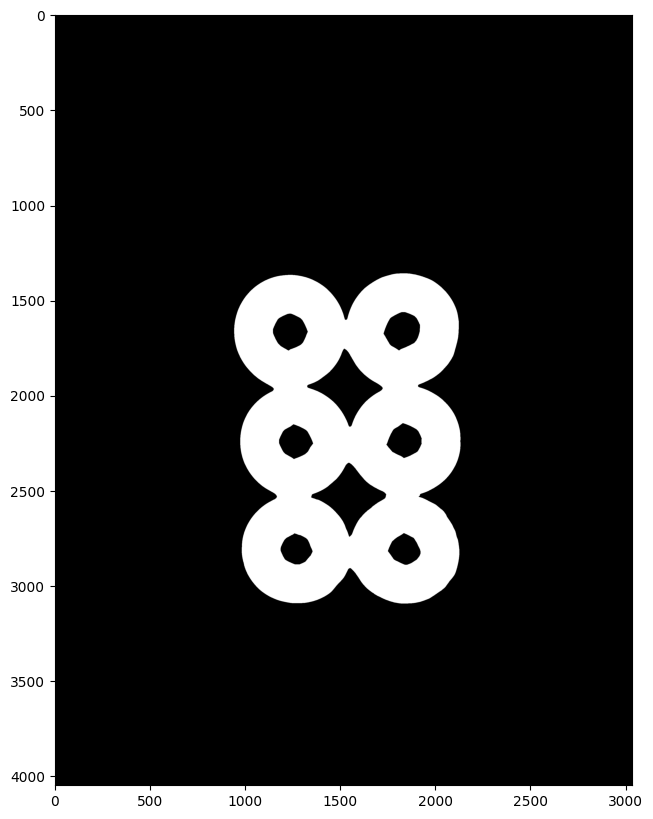

In [33]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
display(unknown)


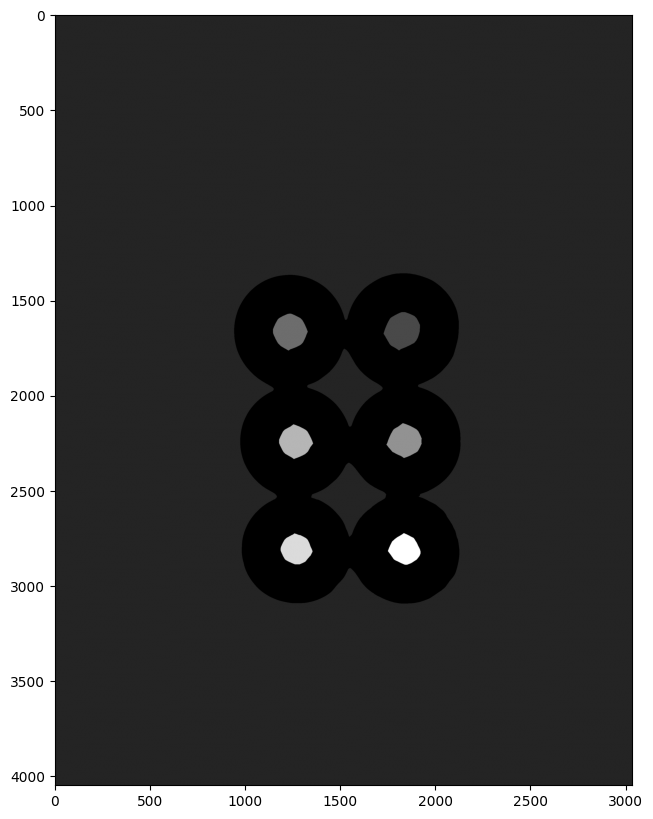

In [34]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown==255] = 0
display(markers)

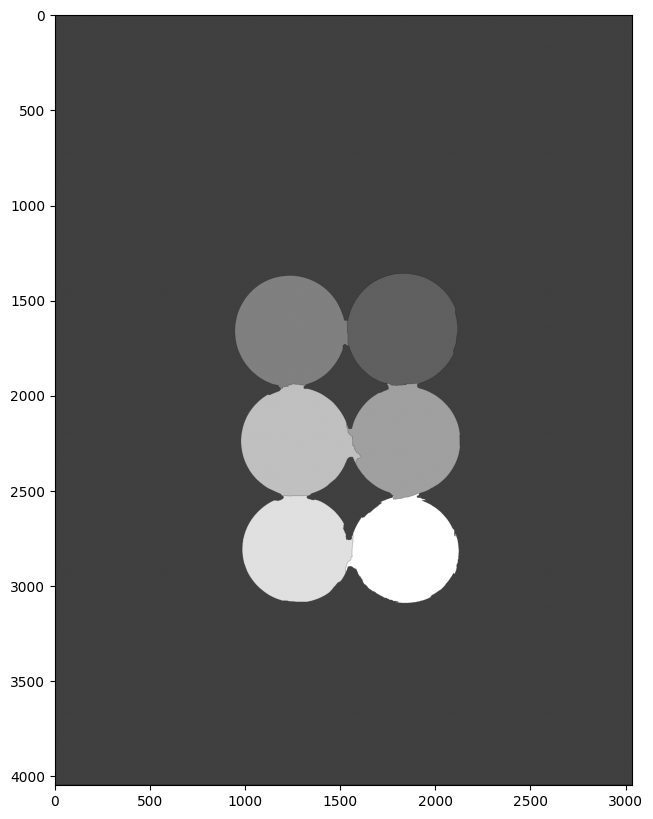

In [35]:
markers = cv2.watershed(img, markers)
display(markers)

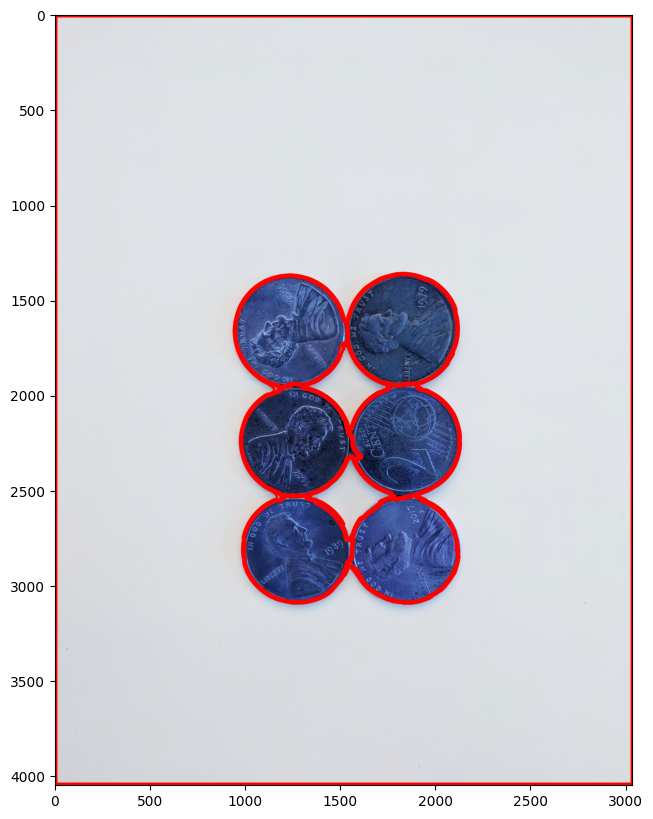

In [36]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if(hierarchy[0][i][3] == -1):
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

display(sep_coins)